# Met-enkephalin Spatial Decorrelation

In [1]:
import pyemma
import os
import pyemma.coordinates as coor
import pyemma.msm as msm
import pyemma.plots as mplt
import MDAnalysis as mdanal
import matplotlib
%pylab inline

matplotlib.rcParams.update({'font.size': 12})
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


/Users/fxp/anaconda2/lib/python2.7/site-packages/pyemma/__init__.py:91: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.4, you have 2.3.2.
  .format(latest=latest, current=current), category=UserWarning)


In [2]:
plt.style.use('ggplot');

## Select Coordinates of Interest

The function below is a generic driver for obtaining coordinates of interest. The line with Ca specifies the coordinates selected, and is based on MDAnalysis selection syntax (http://pythonhosted.org/MDAnalysis/documentation_pages/selection.html). You can use a variety of atom selections that can be returned as a numpy array.

In [3]:
indir = '/Users/fxp/Documents/1026324/'
topfile = indir + 'mkf.pdb'
traj_list = []
for filename in os.listdir(indir):
    if filename.endswith('.dcd'):
        traj_list.append(os.path.join(indir,filename))

In [4]:
feat = coor.featurizer(topfile)
feat.add_backbone_torsions(cossin=True)
feat.add_chi1_torsions(cossin=True)

In [5]:
feat.dimension()

22

In [6]:
inp = coor.source(traj_list, feat)
print 'number of trajectories = ',inp.number_of_trajectories()
print 'trajectory length = ',inp.trajectory_lengths()
print 'trajectory time step = ',500.0 / (inp.trajectory_length(0)),'ns'
print 'number of dimension = ',inp.dimension()

number of trajectories =  10
trajectory length =  [ 9979  9999  9992  9996  9986 10001  9977 10010  9983  9993]
trajectory time step =  0.050105220964 ns
number of dimension =  22


In [7]:
pp = inp.get_output()

In [8]:
pp = np.vstack([pp[0], pp[1], pp[2], pp[3], pp[4], pp[5], pp[6], pp[7], pp[8], pp[9]]);

In [9]:
print pp.shape

(99916, 22)


## Spatial Decorrelation of Order 2 (SD2) 

Parameters:
               
               data – a 3n x T data matrix (number 3 is due to the x,y,z coordinates for each atom). Maybe a numpy   
               array or a matrix where,
               
               n: size of the protein 
               
               T: number of snapshots of MD trajectory
               
               m – dimensionality of the subspace we are interested in; Default value is None, in which case m = n
               verbose – print information on progress. Default is true.

Returns:

               A 3n x m matrix U (NumPy matrix type), such that Y = U * data is a 2nd order spatially whitened                        
               coordinates extracted from the 3n x T data matrix. If m is omitted, U is a square 3n x 3n matrix.
               
               Ds: has eigen values sorted by increasing variance
               
               PCs: holds the index for m most significant principal components by decreasing variance S = Ds[PCs] 
    
               S – Eigen values of the ‘data’ covariance matrix
      
               B – Eigen vectors of the ‘data’ covariance matrix. The eigen vectors are orthogonal.  




In [10]:
import SD2
(Y, S, B, U) = SD2.SD2(pp, m=22);

2nd order Spatial Decorrelation -> Looking for 22 sources
2nd order Spatial Decorrelation -> Removing the mean value
2nd order Spatial Decorrelation -> Whitening the data


## Spatial Decorrelation Module of Order 4 (SD4) 

Parameters:
    
        Y -- an mxT spatially whitened matrix (m dimensionality of subspace, T snapshots). May be a numpy 
                array or a matrix where        
        m -- dimensionality of the subspace we are interested in. Defaults to None, in
                which case m=n.
        T -- number of snapshots of MD trajectory
        
        U -- whitening matrix obtained after doing the PCA analysis on m components
                of real data
        
        verbose -- print info on progress. Default is True.
    
Returns:

      	W -- a separating matrix for spatial decorrelation of order 4

In [11]:
import SD4
W = SD4.SD4(Y[0:10,:], m=10, U=U[0:10,:])

4th order Spatial Decorrelation -> Estimating cumulant matrices
SD4 -> Contrast optimization by joint diagonalization
SD4 -> Sweep #  0 completed in 45 rotations
SD4 -> Sweep #  1 completed in 45 rotations
SD4 -> Sweep #  2 completed in 45 rotations
SD4 -> Sweep #  3 completed in 45 rotations
SD4 -> Sweep #  4 completed in 45 rotations
SD4 -> Sweep #  5 completed in 45 rotations
SD4 -> Sweep #  6 completed in 45 rotations
SD4 -> Sweep #  7 completed in 45 rotations
SD4 -> Sweep #  8 completed in 45 rotations
SD4 -> Sweep #  9 completed in 45 rotations
SD4 -> Sweep # 10 completed in 45 rotations
SD4 -> Sweep # 11 completed in 45 rotations
SD4 -> Sweep # 12 completed in 45 rotations
SD4 -> Sweep # 13 completed in 45 rotations
SD4 -> Sweep # 14 completed in 45 rotations
SD4 -> Sweep # 15 completed in 45 rotations
SD4 -> Sweep # 16 completed in 45 rotations
SD4 -> Sweep # 17 completed in 44 rotations
SD4 -> Sweep # 18 completed in 38 rotations
SD4 -> Sweep # 19 completed in 31 rotations
SD

In [12]:
ZPrj = W.dot(pp.T);

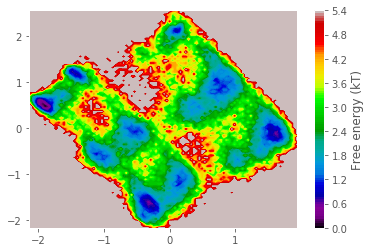

In [13]:
mplt.plot_free_energy(np.asarray(Y)[0,:], np.asarray(Y)[1,:] );

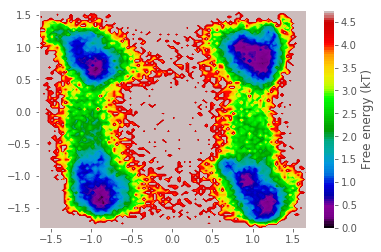

In [14]:
mplt.plot_free_energy(np.asarray(ZPrj)[0,:], np.asarray(ZPrj)[1,:] );

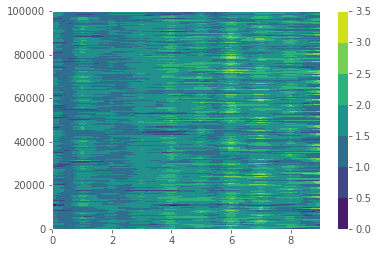

In [15]:
Y_SD2 = np.asarray(Y.T);
xx = plt.contourf(np.abs(Y_SD2[:,0:10]));
plt.colorbar();

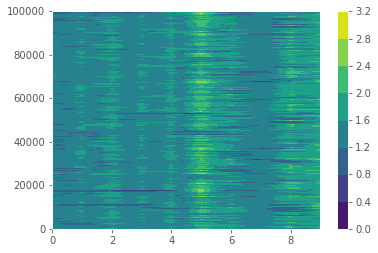

In [16]:
Y_SD4 = np.asarray(ZPrj.T);
xx = plt.contourf(np.abs(Y_SD4[:,0:10]));
plt.colorbar();